In [1]:
# Import Dependencies

import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np

In [2]:
# Path for CSV File
file_path = 'crypto_data.csv'


In [3]:
# Read in CSV as DataFrame
df = pd.read_csv(file_path)
df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [4]:
# Select only traded cryptocurrencies
# conditional
df = df[df["IsTrading"] == True]
# value counts
df["IsTrading"].value_counts()

True    1144
Name: IsTrading, dtype: int64

#### Count of Traded Cryptocurrency 
* True    1144
* Name: IsTrading, dtype: int64

In [5]:
# Drop the 'IsTrading' column from the overall dataframe
df = df.drop(columns=["IsTrading"])


In [6]:
# display dataframe
df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [7]:
# identify null values
for column in df.columns:
    print(f"{column} contains {df[column].isnull().sum()} null values")
    
# Columns with null values: Unnamed, CoinName, Algorithm, ProofType, TotalCoinsMined, TotalCoinSupply

Unnamed: 0 contains 0 null values
CoinName contains 0 null values
Algorithm contains 0 null values
ProofType contains 0 null values
TotalCoinsMined contains 459 null values
TotalCoinSupply contains 0 null values


### Columns with null values: 
Unnamed, CoinName, Algorithm, ProofType, TotalCoinsMined, TotalCoinSupply

In [8]:
# Removal of null values
df = df.dropna()

In [9]:
# display dataframe
df
# from 1144 rows to 685 rows

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


tbc->5/19/2022, 4pm

In [10]:
# filtered for mined cryptocurrencies, greater than 0.
df = df[df["TotalCoinsMined"] > 0]


In [11]:
# displayed dataframe
df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [12]:
# for better comprehensibility of machine learning algorithm, drop non-numeric and not inportant "names" column 
df = df.drop(columns=["CoinName", "Unnamed: 0"])

In [13]:
# display dataframe
df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [14]:
# use pd.get_dummies to convert non-numeric into numeric 
df = pd.get_dummies(df)

In [15]:
# display dataframe
df

,TotalCoinsMined,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,TotalCoinSupply_91388946,TotalCoinSupply_92000000000,TotalCoinSupply_9354000,TotalCoinSupply_9507271,TotalCoinSupply_9736000,TotalCoinSupply_98000000,TotalCoinSupply_98100000000,TotalCoinSupply_990000000000,TotalCoinSupply_999481516,TotalCoinSupply_9999999
0,4.199995e+01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.055185e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.927942e+10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1.792718e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


tbc-> 5/19/2022, 7 pm need scaling

In [16]:
# standardize dataset by scaling to weigh the columns
scaler = StandardScaler()
sdf = scaler.fit_transform(df)

In [19]:
# scaled, shape
sdf.shape
# (532, 377)

(532, 377)

In [21]:
# Initialize PCA, linear dimensionality reduction
pca = PCA(n_components=0.90)
pca_df = pca.fit_transform(sdf)

In [24]:
# PCA, shape
pca_df.shape
# (532, 274)

(532, 274)

In [25]:
# transform PCA to DataFrame
pca_df2 = pd.DataFrame(pca_df)
pca_df2.head()

,0,1,2,3,4,5,6,7,8,9,...,264,265,266,267,268,269,270,271,272,273
0,-0.267092,-0.116294,-1.008433e-15,-3.378904e-15,0.029497,1.514572,-0.340449,0.089601,-1.867751,-0.424150,...,-2.471231e+00,4.786625e+00,1.357228e+00,1.006324e-01,-7.960155e-01,2.526940e+00,-5.679366e-01,4.384913e-01,1.047802e+00,1.975108e+00
1,-0.249925,-0.117273,-2.027390e-15,-3.641338e-15,0.025167,1.513565,-0.340359,0.089820,-1.869831,-0.424478,...,1.405663e-01,-1.885287e+00,2.991266e-01,-2.913622e+00,1.399821e-01,4.249204e-01,-9.376443e-01,-2.655428e+00,-9.078040e-01,-1.334609e+00
2,0.314746,-0.002862,-8.364212e-15,3.354356e-15,-0.081839,2.496209,-0.409761,-0.375692,-1.377915,0.000210,...,-2.313031e-01,-9.405548e-02,-3.348065e-01,1.190097e+00,1.848125e+00,-8.221725e-01,-1.373102e+00,1.495991e+00,2.644522e+00,-9.553355e-01
3,-0.250886,-0.222136,-1.814076e-15,1.418096e-14,0.000999,-1.566613,0.156332,-0.120727,0.360156,0.209244,...,-7.008623e-16,-2.092574e-15,9.611825e-16,-9.089307e-17,-2.628859e-15,1.294092e-15,4.881005e-16,-3.434851e-15,-3.820951e-15,-3.943602e-15
4,-0.119293,-0.222472,-9.798979e-15,6.107795e-15,-0.042473,-1.511262,0.136779,-0.073247,0.419963,0.077902,...,-8.009854e-17,7.998121e-16,8.779551e-16,5.431683e-16,1.091343e-15,2.152648e-16,8.160039e-16,-2.941118e-16,-9.611825e-16,-1.181454e-15


In [27]:
# Initialize T-SNE Model
tsne =  TSNE(learning_rate=100)


In [28]:
# tsne features
tsne_features = tsne.fit_transform(pca_df)

In [30]:
# TSNE shape
tsne_features.shape
# (532, 2)

(532, 2)

In [31]:
# TSNE array
tsne_features

array([[  0.32188293,   7.792309  ],
       [  0.2997495 ,  11.17659   ],
       [  8.737756  ,  -9.631971  ],
       ...,
       [  2.4958227 ,  -8.916187  ],
       [ -9.4405575 ,  -6.533369  ],
       [-14.018639  ,  -5.844452  ]], dtype=float32)

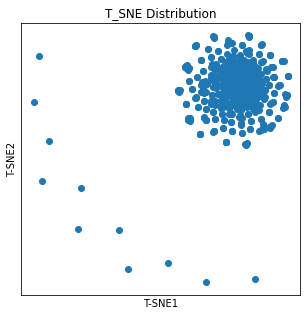

In [33]:
# CryptoClusters Visualization

# figure size
plt.figure(figsize=(5,5))

# scatter plot
plt.scatter(
    x = tsne_features[:,0],
    y = tsne_features[:,1],
)
# title
plt.title("T_SNE Distribution")
plt.xlabel("T-SNE1")
# ylabel
plt.ylabel("T-SNE2")
# xticks
plt.xticks([])
# yticks
plt.yticks([])
# display t-sne
plt.show()

In [35]:
# save image as png
plt.savefig("tsne.png", transparent=False)

<Figure size 432x288 with 0 Axes>